## Feature Selection using PCA


In [1]:
import pylab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['TARGET'] = boston['target']

In [3]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
FEATURES = list(boston_df.columns[:-1])

FEATURES

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [5]:
len(FEATURES)

13

## Apply PCA
* PCA: Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
* explained_variance_ : The amount of variance explained by each of the selected components.
* components_ : Principal axes in feature space, representing the directions of maximum variance in the data.
* fit_transform : Fit the model with X and apply the dimensionality reduction on X

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [8]:
from sklearn.decomposition import PCA

def apply_pca(X, n):
    
    pca = PCA(n_components = n)  
    x_new = pca.fit_transform(X)   
        
    return pca, pd.DataFrame(x_new)

In [9]:
pca, _ = apply_pca(boston_df[FEATURES], len(FEATURES))

In [10]:
print("Explained Variance:", pca.explained_variance_ratio_)

Explained Variance: [8.05823175e-01 1.63051968e-01 2.13486092e-02 6.95699061e-03
 1.29995193e-03 7.27220158e-04 4.19044539e-04 2.48538539e-04
 8.53912023e-05 3.08071548e-05 6.65623182e-06 1.56778461e-06
 7.96814208e-08]


In [11]:
sum(pca.explained_variance_ratio_)

1.0

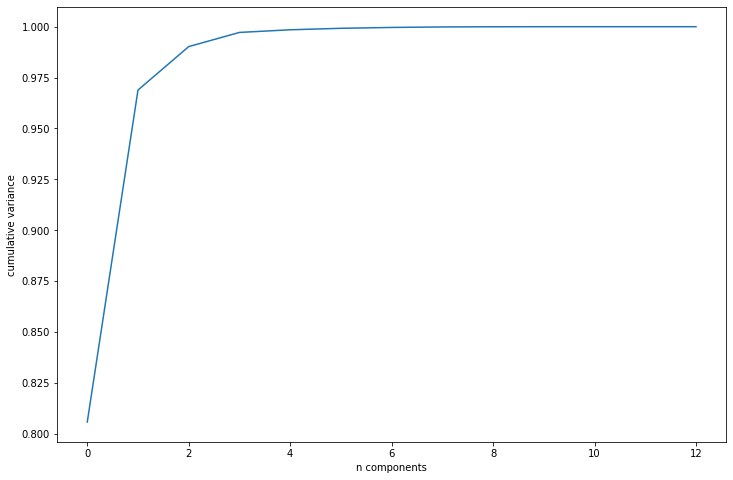

In [12]:
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('n components')
plt.ylabel('cumulative variance');

## Build model

In [13]:
def build_model(regression_fn,                
                target, 
                features, 
                dataset,
                n):
    
    X = dataset[features]
    Y = dataset[target]

    _ , X_new = apply_pca(X, n)

    x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2)
    
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test) 
    
    return {
            'x_initial' : X,
            'x_transform': X_new,
            'x_train' : x_train,
            'x_test'  : x_test, 
            'y_train' : y_train,
            'y_test'  : y_test,
            'y_pred'  : y_pred,
            'model'   : model
           }     

In [14]:
def linear_reg(x_train, y_train):
    
    model = LinearRegression().fit(x_train, y_train)
    
    return model

## Sklearn Model

In [15]:
model_params = {}

In [16]:
model_params['sklearn_reg'] = build_model(regression_fn=linear_reg,
                                          target='TARGET',
                                          features=FEATURES,
                                          dataset=boston_df,
                                          n=6)

In [17]:
model       = model_params['sklearn_reg']['model']
x_transform = model_params['sklearn_reg']['x_transform']
x_train     = model_params['sklearn_reg']['x_train']
x_test      = model_params['sklearn_reg']['x_test']
y_train     = model_params['sklearn_reg']['y_train']
y_test      = model_params['sklearn_reg']['y_test']
y_pred      = model_params['sklearn_reg']['y_pred']

In [18]:
x_transform.shape

(506, 6)

In [19]:
print('Training score: ', model.score(x_train, y_train))
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.5723906470743593
Testing score:  0.5954482093743374


## Exercise: Demonstrate that a linear autoencoder get the same results as PCA

First, lets load up the Iris data-set and scale it between [0,1].

In [20]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

Plot 2D clusters for this dataset

In [21]:
def plot_clusters(X, title, vtitle):
  plt.figure()
  colors = ['red', 'blue', 'green']
  lw = 2

  for color, i, target_name in zip(colors, [0, 1, 2], target_names):
      plt.scatter(X.loc[y == i, 0], X.loc[y == i, 1], color=color, alpha=1., lw=lw,
                  label=target_name)
  plt.legend(loc='best', shadow=False, scatterpoints=1)
  plt.title(title)  
  plt.xlabel(vtitle + "1")
  plt.ylabel(vtitle + "2")
  plt.show()

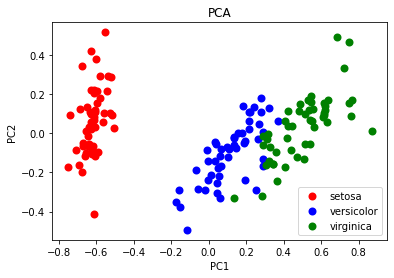

In [22]:
_, pca_transformed = apply_pca(X_scaled, 2)
plot_clusters(pca_transformed, "PCA", "PC")  

Let's build a neural network as a linear Autoencoder that has 3 layers (encoding, hidden and decoding): 

*   Use a linear activation function for encoding and decoding layers
*   The hidden layer should have two neurons

Essentially this structure approximates PCA by reducing the data from the original dimension (four features) to two features in the hidden layer (like PC1 and PC2)

In [23]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers


In [24]:
# Create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
def autoencoder_builder(activation='linear', activity_regularizer=None):
  input_dim = X_scaled.shape[1]
  encoding_dim = 2  
  input_img = Input(shape=(input_dim,))
  encoded = Dense(encoding_dim, activation=activation, 
                  activity_regularizer=activity_regularizer)(input_img)
  decoded = Dense(input_dim, activation='sigmoid')(encoded)
  autoencoder = Model(input_img, decoded)
  autoencoder.compile(optimizer='rmsprop', loss='mse')
  print(autoencoder.summary())

  history = autoencoder.fit(X_scaled, X_scaled,
                  epochs=1000,
                  batch_size=16,
                  shuffle=True,
                  verbose = 0)

  #plot our loss 
  plt.plot(history.history['loss'])
  plt.title('model train')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend('train', loc='upper right')
  plt.show()

  # use our encoded layer to encode the training input
  encoder = Model(input_img, encoded)
  encoded_input = Input(shape=(encoding_dim,))
  decoder_layer = autoencoder.layers[-1]
  decoder = Model(encoded_input, decoder_layer(encoded_input))
  encoded_data = encoder.predict(X_scaled)
  
  return encoded_data

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 12        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
None


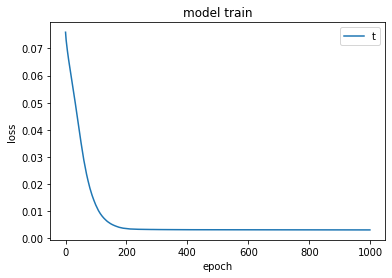

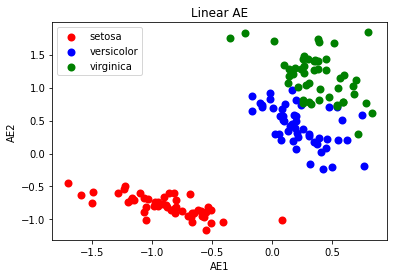

In [25]:
linear_output = autoencoder_builder('linear')
plot_clusters(pd.DataFrame(linear_output), 'Linear AE', 'AE')  

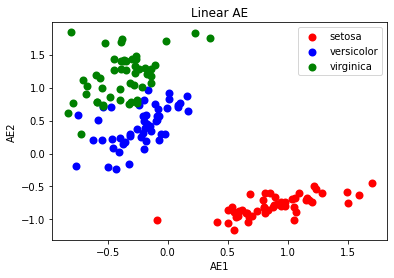

In [26]:
plot_clusters(pd.DataFrame(np.append(-linear_output[:,0].reshape(150,1), 
                                     linear_output[:,1].reshape(150,1), axis=1)), 
              'Linear AE', 'AE')  

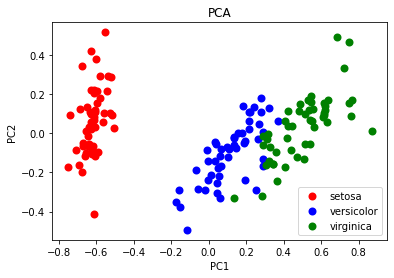

In [27]:
plot_clusters(pca_transformed, "PCA", "PC") 

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 12        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
None


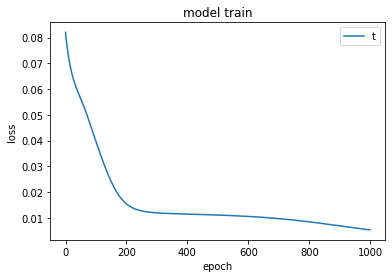

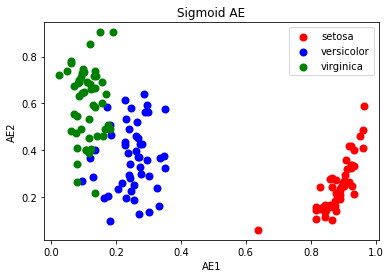

In [28]:
sigmoid_output = autoencoder_builder('sigmoid')
plot_clusters(pd.DataFrame(sigmoid_output), 'Sigmoid AE', 'AE')  

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 12        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
None


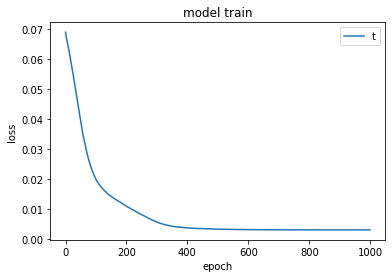

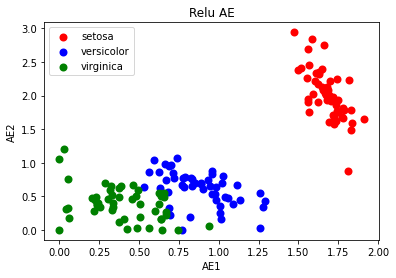

In [29]:
relu_output = autoencoder_builder('relu')
plot_clusters(pd.DataFrame(relu_output), 'Relu AE', 'AE')  

Let's add an activity regularizer: 

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 12        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
None


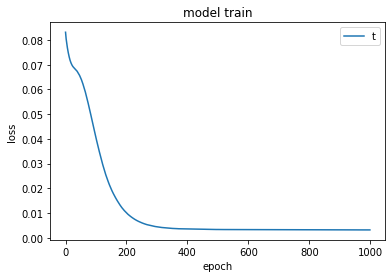

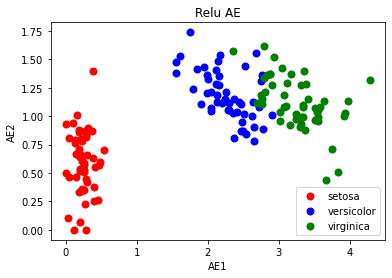

In [30]:
relu_reg_output = autoencoder_builder('relu', 
                                      activity_regularizer=regularizers.l1(10e-6))
plot_clusters(pd.DataFrame(relu_reg_output), 'Relu AE', 'AE')  

With these representation we can run a clustering algorithm to look for differences: 


In [31]:
from sklearn.cluster import KMeans
labels_true = y 
titles = ['PCA', 'Linear AE', 'Sigmoid AE', 'Relu AE']
n_clusters_ = 3

estimators = [('PCA'    , KMeans(n_clusters=n_clusters_, random_state = 0), 
               np.array(pca_transformed, dtype=linear_output.dtype)),
              ('AE linear' , KMeans(n_clusters=n_clusters_, random_state = 0), 
               linear_output),
              ('AE sigmoid' , KMeans(n_clusters=n_clusters_, random_state = 0), 
               sigmoid_output),
              ('AE relu', KMeans(n_clusters=n_clusters_, random_state = 0), 
               relu_output)]

Compare results using homogeneity score: 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html

In [32]:
from sklearn.metrics import completeness_score

for name, est, data in estimators:
    X = data
    est.fit(X)
    labels = est.labels_
    print(name)
    print("Completeness_score: %0.3f" % completeness_score(labels_true, labels))

PCA
Completeness_score: 0.747
AE linear
Completeness_score: 0.772
AE sigmoid
Completeness_score: 0.680
AE relu
Completeness_score: 0.821
